# Supervised learning algorithms

In this guide, we are going to talk about the different kinds of supervising learing algorithms by analizing the steps needed to evaluate the best algorithm for a specific problem.

## Analysis of supervised learning algorithms

Before get started, is important to point out that the library that we will be using during this tutorial is the [SciKit learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) for *Python 3*. Now, lets talk about the steps needed to train a machine learning algorithm:

* Selection of the features.
* Choosing a performance metric.
* Choosing a supervising learning algorithm.
* Evaluating the performance of the model.
* Tunning the algorithm.

We will be using a dataset for classifying the [galss](https://www.kaggle.com/uciml/glass/version/1). The intention of this dataset is to use these data to identify glass pieces in crime scenes. The data set has the following types of glasses:

1. Building window float processed.
2. Building window non-float processed.
3. Vehicle windows float processed.
4. Vehicle windows non-float processed.
5. Containers.
6. Tableware.
7. Headlamps.

And the features are:

* **RI**: Refractive index.
* **Na**: Sodium.
* **Al**: Aluminum.
* **Si**: Silicon.
* **K**: Potassium.
* **Ca**: Calcium.
* **Ba**: Barium.
* **Fe**: Iron.

First, we are going to import the dataset into the python evironment, using Pandas library:

In [270]:
import numpy as np
import pandas as pd

datasetFile = "glass.csv"
dataFrame = pd.read_csv(datasetFile, header = 0)

# Remove the non-numeric columns
dataFrame = dataFrame._get_numeric_data()

# Get the numeric headers in a python list
numericHeaders = list(dataFrame.columns.values)

# Get a numpy array
npData = dataFrame.values

#featuresData = npData[:, 0:8]
featuresData = npData[:, [1, 4]]
targetData = npData[:, 9]

Once we have the data imported, before start training the model, we need to split the data set into training and test datasets.

In [271]:
from sklearn.model_selection import train_test_split

# Split the datasets
featuresData_Train, featuresData_Test, targetData_Train, targetData_Test = train_test_split(featuresData, targetData,
                                                                                      test_size=0.3, random_state=0)

In the above code, we are dividing, randomly, the data set into 30% of test data and 70% of train data. Now let's do some preprocessing over the train and test datasets, scaling the data. The idea is normalize and standarize the features of the datasets before applying any machine learning algorithm.

In [272]:
from sklearn.preprocessing import StandardScaler

# Initiating the StandardScaler object
sc = StandardScaler()

# Estimate the sample mean and standard deviation of the fetures in the training dataset
sc.fit(featuresData_Train)

# Whit transform methods, we standarize the training and test datasets
featuresData_TrainStd = sc.transform(featuresData_Train)
featuresData_TestStd = sc.transform(featuresData_Test)

With the data standarized, we can apply one model as an example. The following code make use of the perceptron model.

In [273]:
from sklearn.linear_model import Perceptron

# eta is equivalent to the learning rate and max_iter is the number of epochs over the data
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=0)
perceptron.fit(featuresData_TrainStd, targetData_Train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

Now that we have trained the model, we can perform some prediction.

In [274]:
targetPredictions = perceptron.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != targetPredictions))

Misclassified samples: 46


Finally, let's plot a couple of graphics that will help in the analysis of the model trained.

In [275]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt

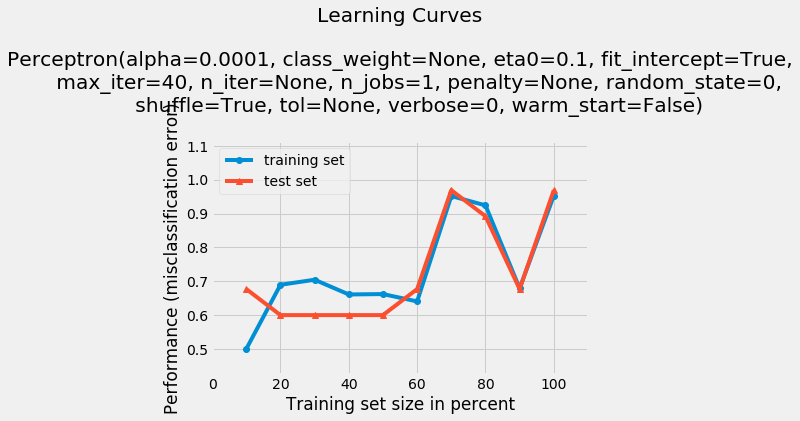

In [276]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, perceptron)
plt.show()

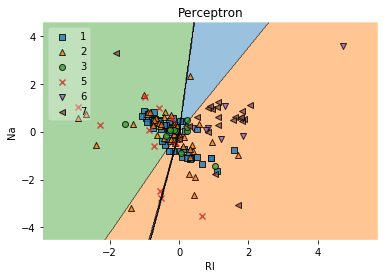

In [277]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=perceptron, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Perceptron')
plt.show()

## kNN

In [278]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = 1
neigh = KNeighborsClassifier(n_neighbors=neighbors)
neigh.fit(featuresData_TrainStd, targetData_Train)

neighborsPredictions = neigh.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != neighborsPredictions))

Misclassified samples: 37


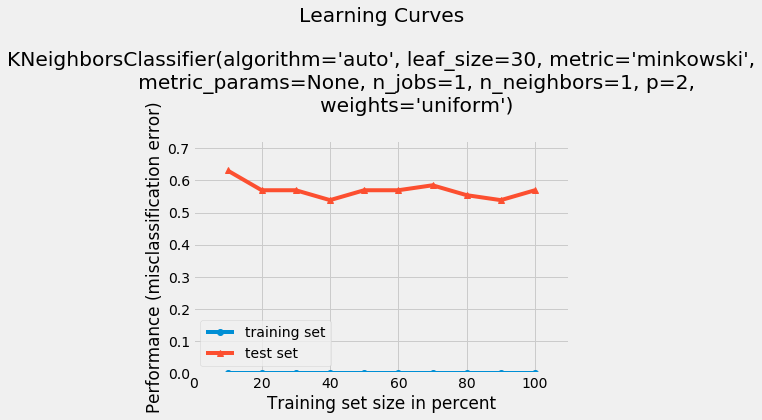

In [279]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, neigh)
plt.show()

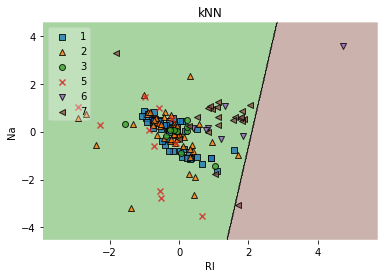

In [280]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=neigh, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('kNN')
plt.show()

## Naive bayes

In [281]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(featuresData_TrainStd, targetData_Train)
bayesPredictions = gnb.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != neighborsPredictions))

Misclassified samples: 37


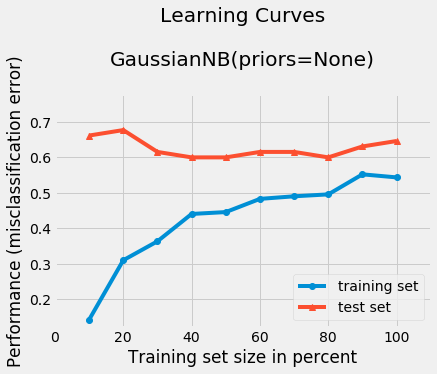

In [282]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, gnb)
plt.show()

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


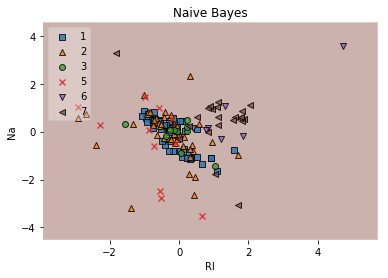

In [283]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=gnb, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Naive Bayes')
plt.show()

## Decision Tree

In [284]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(featuresData_TrainStd, targetData_Train)
decisionPredictions = clf.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != decisionPredictions))

Misclassified samples: 35


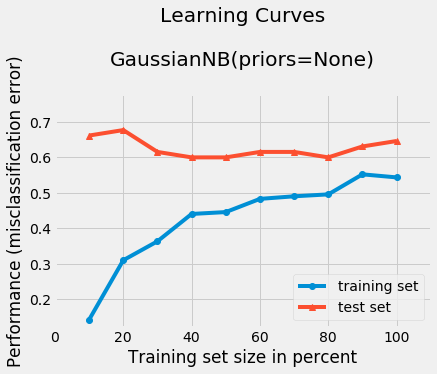

In [285]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, gnb)
plt.show()

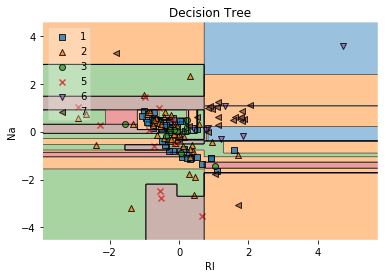

In [286]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=clf, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Decision Tree')
plt.show()

## Random forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

forestModel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
forestModel.fit(featuresData_TrainStd, targetData_Train)
forestPredictions = forestModel.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != forestPredictions))

Misclassified samples: 31


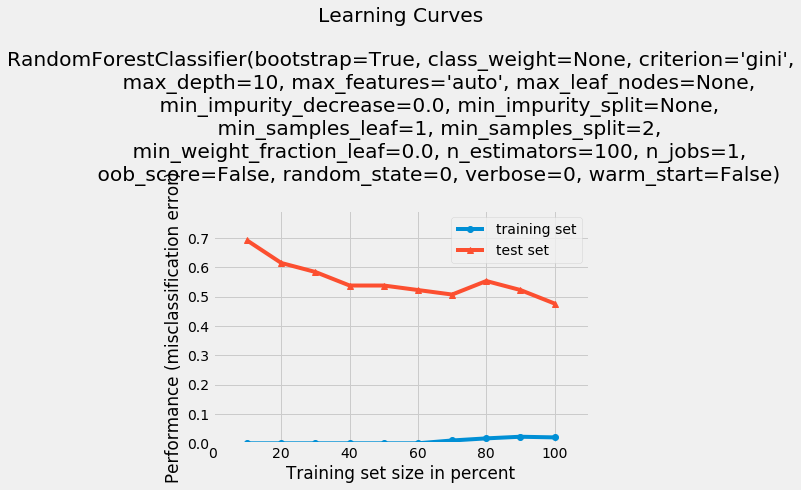

In [288]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, forestModel)
plt.show()

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


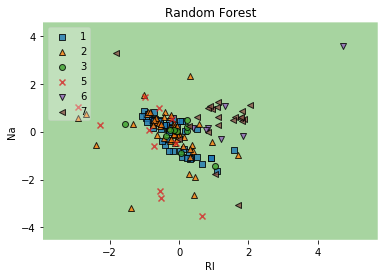

In [289]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=forestModel, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Random Forest')
plt.show()

## Kernel SVM

In [290]:
from sklearn import svm

kernelSVM = svm.SVC(kernel='rbf', gamma=2)
kernelSVM.fit(featuresData_TrainStd, targetData_Train)
svmPredictions = kernelSVM.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != svmPredictions))

Misclassified samples: 37


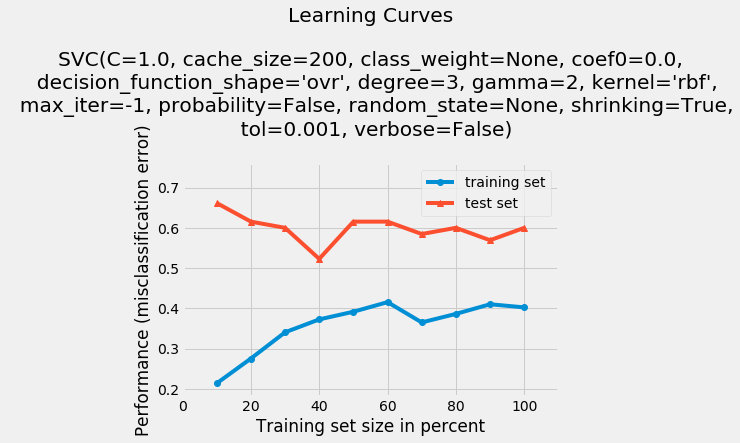

In [291]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, kernelSVM)
plt.show()

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


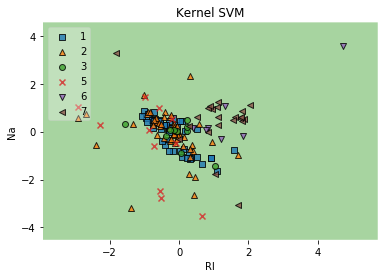

In [292]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=kernelSVM, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Kernel SVM')
plt.show()

## Bagging meta-estimator

In [293]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(featuresData_TrainStd, targetData_Train)
baggingPredictions = bagging.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != baggingPredictions))

Misclassified samples: 34


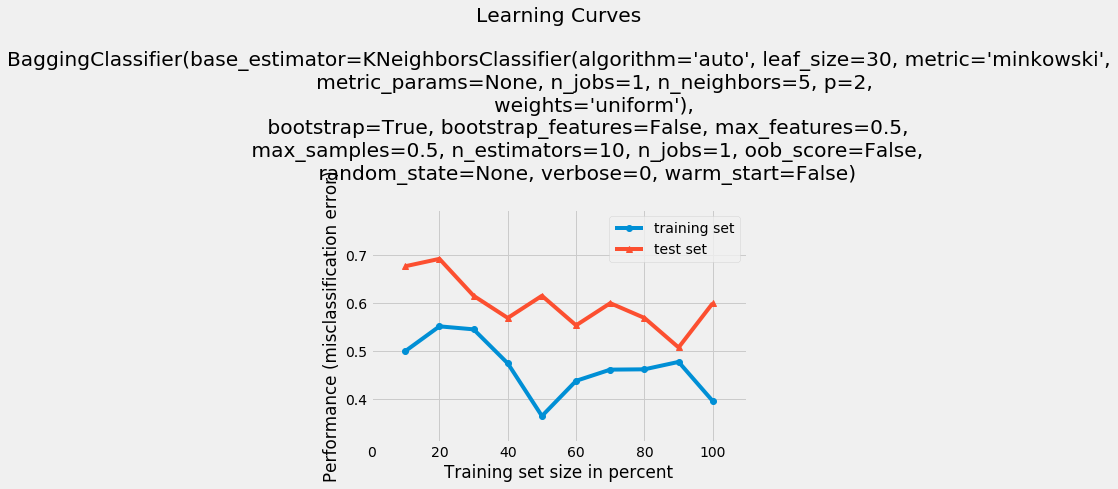

In [294]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, bagging)
plt.show()

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


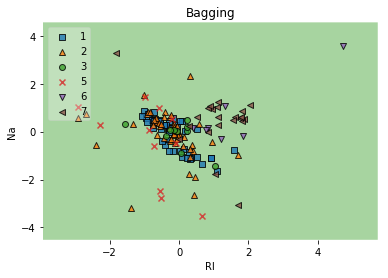

In [295]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=bagging, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Bagging')
plt.show()

## Forests of randomized trees

In [296]:
from sklearn.ensemble import RandomForestClassifier

forestRandomTrees = RandomForestClassifier(n_estimators=10)
forestRandomTrees.fit(featuresData_TrainStd, targetData_Train)
forestRandomTreesPredictions = forestRandomTrees.predict(featuresData_TestStd)
print('Misclassified samples: %d' % np.sum(targetData_Test != forestRandomTreesPredictions))

Misclassified samples: 34


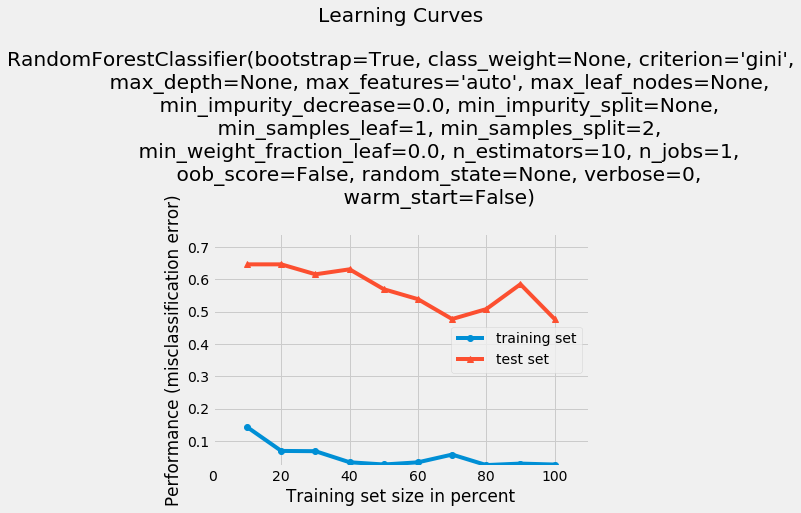

In [297]:
plot_learning_curves(featuresData_Train, targetData_Train, featuresData_Test, targetData_Test, forestRandomTrees)
plt.show()

/anaconda3/envs/patterns-recognition/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


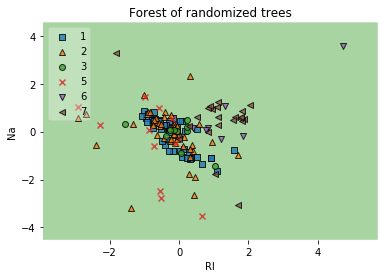

In [298]:
value = 1.5
width = 5

# Plotting decision regions
plot_decision_regions(featuresData_TrainStd, targetData_Train.astype(np.integer), clf=forestRandomTrees, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width})

# Adding axes annotations
plt.xlabel(numericHeaders[0])
plt.ylabel(numericHeaders[1])
plt.title('Forest of randomized trees')
plt.show()